In [96]:
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
iris = datasets.load_iris()

Text(0.5, 1.0, 'Dataset of Iris flowers')

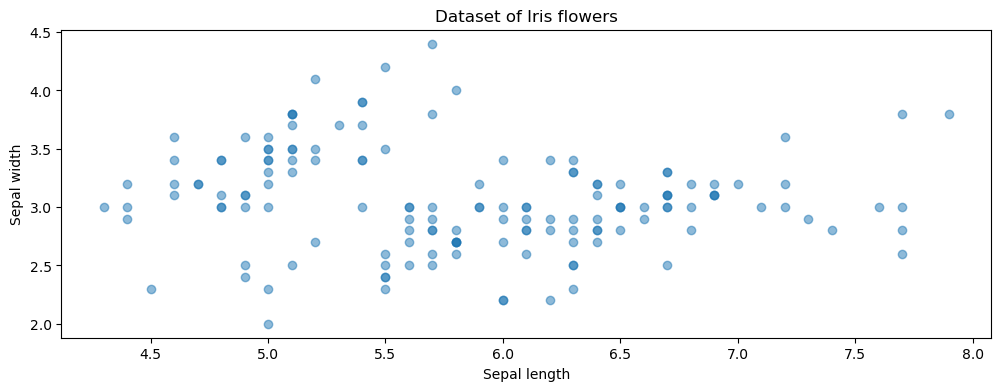

In [97]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12,4]

plt.scatter(iris.data[:,0],iris.data[:,1],alpha = 0.5)
plt.ylabel("Sepal width")
plt.xlabel("Sepal length")
plt.title("Dataset of Iris flowers")

In [98]:
from sklearn import cluster
model = cluster.KMeans(n_clusters = 3)
model.fit(iris.data)

KMeans(n_clusters=3)

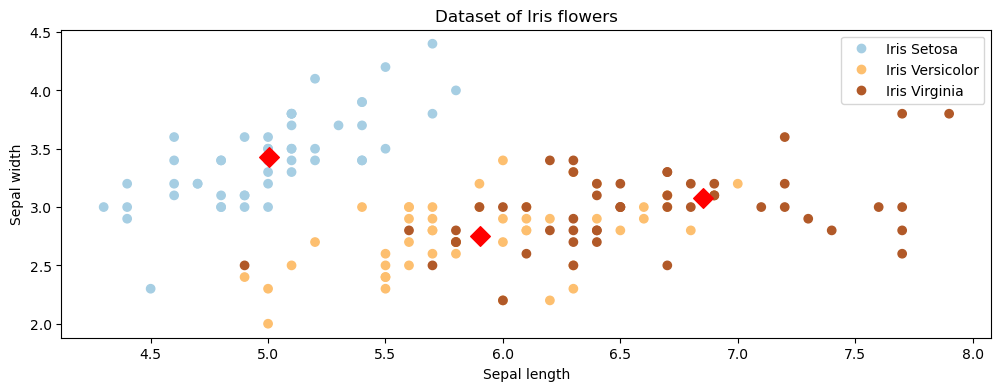

In [99]:
p1 = plt.scatter(iris.data[:,0],iris.data[:,1],c = iris.target,cmap = 'Paired')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker = 'D',c = 'r',s = 100)
plt.ylabel("Sepal width")
plt.xlabel("Sepal length")
plt.title("Dataset of Iris flowers")
plt.legend(handles = p1.legend_elements()[0], labels = ['Iris Setosa', 'Iris Versicolor','Iris Virginia'])

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.3,random_state = 42)

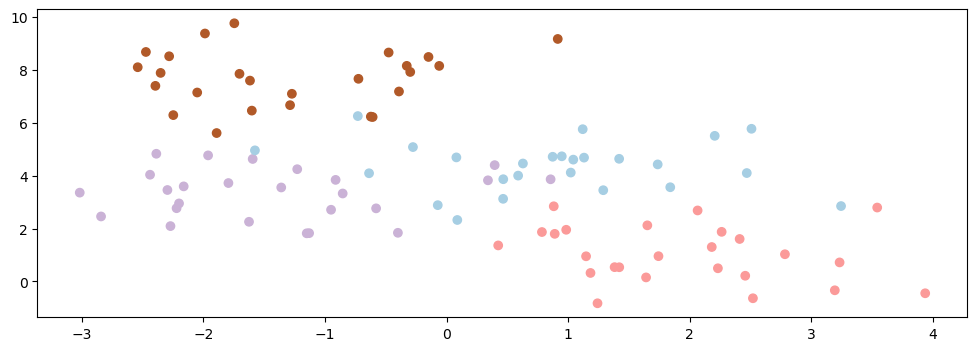

In [101]:
# elbow method using random generated data pts
np.random.seed(0)
X,y = datasets.make_blobs(centers = 4)
plt.scatter(X[:,0],X[:,1],c = y,cmap = 'Paired')

Text(0, 0.5, 'Objective Function Value')

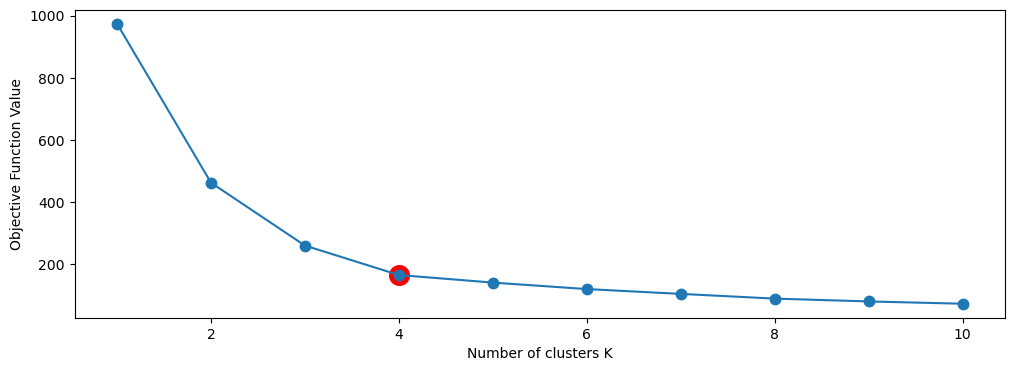

In [102]:
Ks, objs = range(1,11), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    objs.append(-model.score(X))

plt.plot(Ks, objs, '.-', markersize=15)
plt.scatter([4], [objs[3]], s=200, c='r')
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")

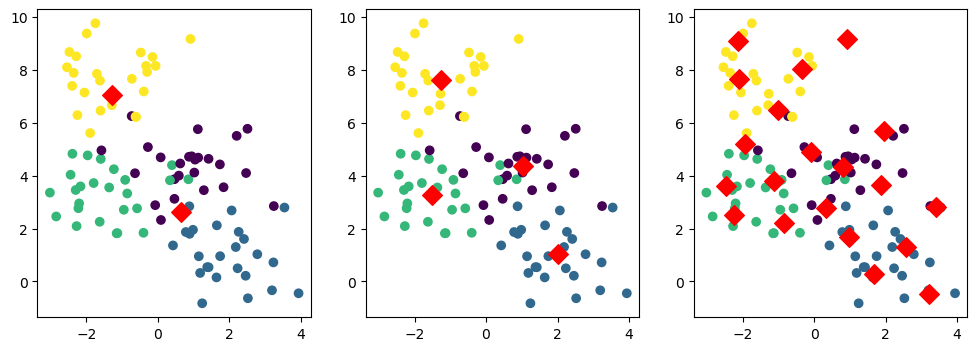

In [103]:
ks, titles = [2,4,20],['Underfitting','Good Fit','Overfitting']
f,axes = plt.subplots(1,3)
for k,title,ax in zip(ks,titles,axes):
    model = cluster.KMeans(n_clusters = k)
    model.fit(X)
    ax.scatter(X[:,0],X[:,1],c = y)
    ax.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker = 'D',c = 'r',s = 100)